In [163]:
import pandas as pd
import numpy as np
import re
import csv
import seaborn as sns
import tweepy
import matplotlib.pyplot as plt
import nltk
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
# nltk.download('punkt')
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# nltk.download('stopwords')
import string
import emoji
import contractions
import re
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [164]:
def cleansing(text):
    # Replace RT tag
    t1 = re.sub('RT\s', '', text)
    # Replace @_username
    t2 = re.sub('\B@\w+', "", t1)
    # Replace emojis with text
    t3 = emoji.demojize(t2)
    # Replace URL (http:// or https://)
    t4 = re.sub('(http|https):\/\/\S+', '', t3)
    # Replace #_something_
    t5 = re.sub('#+', '', t4)
    # Lower case each letter
    t6 = t5.lower()
    
    # Replace word repetition with a single occurance ('ooooooooo' becomse 'oo')
    t7 = re.sub(r'(.)\1+', r'\1\1', t6)
    # Replace punctuation repetition with a single occurance ('!!!!!!!!' becomes '!')
    t8 = re.sub(r'[\?\.\!]+(?=[\?.\!])', '', t7)
    # Alphabets only, exlude numbers and special characters
    t9 = re.sub(r'[^a-zA-Z]', ' ', t8)
    t10 = re.sub('(?:$|\W)c(?:$|\W)', ' ', t9)
    t11 = re.sub('(?:$|\W)x(?:$|\W)', ' ', t10)
    t12 = re.sub('(?:$|\W)bk(?:$|\W)', ' ', t11)
    t13 = re.sub('(?:$|\W)itu(?:$|\W)', ' ', t12)
    t14 = re.sub('(?:$|\W)DI(?:$|\W)', ' ', t13)
    t15 = re.sub('(?:$|\W)SI(?:$|\W)', ' ', t14)
    t16 = re.sub('(?:$|\W)ya(?:$|\W)', ' ', t15)
    t17 = re.sub('(?:$|\W)dia(?:$|\W)', ' ', t16)
    t18 = re.sub('(?:$|\W)jadi(?:$|\W)', ' ', t17)
    t19 = re.sub('(?:$|\W)kalia(?:$|\W)', ' ', t18)
    t20 = re.sub('(?:$|\W)sama(?:$|\W)', ' ', t19)
    t21 = re.sub('(?:$|\W)nya(?:$|\W)', ' ', t20)
    t22 = re.sub('(?:$|\W)lagi(?:$|\W)', ' ', t21)
    t23 = re.sub('(?:$|\W)kan(?:$|\W)', ' ', t22)
    t24 = re.sub('(?:$|\W)apa(?:$|\W)', ' ', t23)
    t25 = re.sub('(?:$|\W)ini(?:$|\W)', ' ', t24)
    t26 = re.sub('(?:$|\W)sama(?:$|\W)', ' ', t25)
    t27 = re.sub('(?:$|\W)lagi(?:$|\W)', ' ', t26)
    t28 = re.sub('(?:$|\W)aja(?:$|\W)', ' ', t27)

    # Replace contractions with their extended forms
    t29 = contractions.fix(28)
    return t29

In [165]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [166]:
# Twitter API Farhan
consumerKey = 'dUdEAr3uIpGTnAlzk90LRUVxD'
consumerSecret = 'dwXfJM4PiggHHLq2tyEbTp9dOzb8boHTFqOzRml8RAXkbk7SWL'
accessToken = '1196979266518278144-XCmhoiLue49JTjLAZMpgnGtpItTL5p'
accessTokenSecret = 'CQLKOFhTSUVD9pIwnlN7snSMV9126uKlF03Dvkdo8EzBV'

authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)
# Setting the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)
# Creating the API object while passing the authentication information
api = tweepy.API(authenticate, wait_on_rate_limit= True)

In [167]:
keyword = str(input("Enter the  keyword/hashtag (if using hashtag, add #): "))
result = keyword + " -filter:retweets"
num = int(input("Enter the number of recent tweets you would like to use: "))

Enter the  keyword/hashtag (if using hashtag, add #): sambo
Enter the number of recent tweets you would like to use: 100


In [171]:
# Open/Create a file to append data
csvFile = open(keyword+'.csv', 'a')

#Use csv Writer
csvWriter = csv.writer(csvFile)

posts = api.search_tweets(q = result, count=num, lang= 'id',tweet_mode = 'extended')
print("Searching the ",num," recent tweets in the past 7 days (language = Indonesia)\n")  
print("Note: There could be less tweet than specified \n") 
i=1
for tweet in posts[0:num]:
    text_no_emoji = remove_emoji(tweet.full_text)
    text_clean = cleansing(text_no_emoji)
    csvWriter.writerow([text_clean])
    i+=1

csvFile.close()

In [172]:
# Creating a data frame with a column called Tweets so it looks nice
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
df = pd.DataFrame( [tweet.full_text for tweet in posts] , columns=['Tweets'])
df.index = df.index + 1
df

,Tweets
1,"@cantstoptotalk Kalo lu bawa nama kampus gk usah asal2 an semena2 gk inget apa itu Sambo, nama Polisi jadi jelek semua kan padahal yg jahat oknum, itu karna apa? ""main hakim sendiri"" dor org ampe mati."
2,@Denzel_Sambo Rawinky risat rabuda\nNdiribusy
3,Panas! Jaksa VS Kuasa Hukum Irfan Widyanto Hingga Acungkan Jempol ke Bawah di Sidang Kasus Sambo\nhttps://t.co/jM49bRVRN0\n\n#BeritaSonora via @KompasTV
4,Sidang sambo nggak abis-abis
5,@Lindiwe_Sambo Usuke ungakadli….so uhamba kancono umthandazo mulambile
6,Hendra Kurniawan Ungkap 5 Arahan Ferdy Sambo Usai Kematian Brigadir J https://t.co/ARBcuTu7KP
7,Panas! Jaksa VS Kuasa Hukum Irfan Widyanto Hingga Acungkan Jempol ke Bawah di Sidang Kasus Sambo https://t.co/ZqxHHZZBi5
8,Irfan Widyanto Bantah Screening 20 CCTV di Rumdin Ferdy Sambo https://t.co/M2xgYn3zV4
9,Gesss ada yang punya kucing betina jenis apa aja yg umur 4/5 bulan buat temenin sambo di kamar kalau ada inpoin ya https://t.co/w5XYHeb1K0
10,"@whitejaesmine sambo aja dlu, penasaran ada berapa pejabat yg kesaring wkwk"


In [174]:
df1 = pd.read_csv('D:\\DOWNLOAD\\akuisisi1.csv')
df1

,text,target
0,"Pas dikatrol sambo kagak nangis,giliran kena getahnya nangis.",negatif
1,"Ini kasus sambo kapan kelarnya sih, bapak gw marah2 mulu kalo liat sidang sambo",negatif
2,Irjen sambo ( irisan jengkol sambal balado ),negatif
3,Wkwk sambo nih emang nyebelin. Tapi liat istrinya lebih bikin eneg sih,negatif
4,Sebenarnya masih ada yg percaya putri sambo gaseh,negatif
5,Sambo aja gak berseri duidnya banyak bener. Prospeknya cerah sih. Namanya jg idaman mertua. Halodek,negatif
6,Siapa Juara Berbohong,negatif
7,"Smua HP dikasus Sambo ini baik saksi maupun terdakwa kebanyakan hilang, dirusakin hadehhh DRAMA",negatif
8,Kasus sambo lagi kasus ini lagi yang muncul ditv nih kasus kapan selesai nya elah 🥲 dahlah,negatif
9,Sidang Sambo dan Candrawathi ini bertele-tele banget ya.,negatif


In [175]:
#Tokenization

def tokenization(text):
    text = re.split('\W+',text)
    return text

df1['TOKENIZATION'] = df1['text'].apply(lambda x:tokenization(x.lower()))
df1.head

<bound method NDFrame.head of                                                                                                                                                                                                                                                                                          text  \
0                                                                                                                                                                                                                              Pas dikatrol  sambo kagak nangis,giliran kena getahnya nangis.   
1                                                                                                                                                                                                             Ini kasus sambo kapan kelarnya sih, bapak gw marah2 mulu kalo liat sidang sambo   
2                                                                                                      

In [176]:
#Stop Removal

stopword = nltk.corpus.stopwords.words('D:\\DOWNLOAD\\stopp.txt')

def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

df1['STOP_REMOVAL'] = df1['TOKENIZATION'].apply(lambda x: remove_stopwords(x))

In [1]:
#Normalizazion
normalizad_word = pd.read_csv('D:\\DOWNLOAD\\baru.csv')

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]
df1['tweet_normalized'] = df1['STOP_REMOVAL'].apply(normalized_term)

df1['tweet_normalized'].head(10)

In [144]:
# ------ Proses Stemming --------
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in df1['tweet_normalized']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

df1['tweet_tokens_stemmed'] = df1['tweet_normalized'].swifter.apply(get_stemmed_term)
print(df['tweet_tokens_stemmed'])

1337
------------------------
kelarnya : kelar
sih : sih
marah2 : marah2
mulu : mulu
liat : liat
sidang : sidang
juara : juara
berbohong : bohong
smua : smua
hp : hp
dikasus : kasus
saksi : saksi
terdakwa : dakwa
kebanyakan : banyak
hilang : hilang
dirusakin : dirusakin
hadehhh : hadehhh
drama : drama
bertele : tele
tele : tele
 : 
beda : beda
coy : coy
perwira : perwira
lulusan : lulus
akpol : akpol
4thn : 4thn
ecek2 : ecek2
mah : mah
tamtama : tamtama
bintara : bintara
temen : temen
gak : gak
bikin : bikin
sok : sok
an : an
kaya : kaya
video : video
diatas : atas
sumpah : sumpah
bbrp : bbrp
kmrn : kmrn
kegiatan : giat
abis : abis
pulang : pulang
kerja : kerja
nontonin : nontonin
park : park
solomon : solomon
terabaikan : abai
hukum : hukum
mati : mati
orang : orang
bantu : bantu
menghambat : hambat
penyelidikan : lidi
umur : umur
hidup : hidup
nkri : nkri
udah : udah
percaya : percaya
penegak : tegak
kosumsi : kosumsi
rakyat : rakyat
tegakan : tega
keadilan : adil
sesungguhnya : sung

Pandas Apply:   0%|          | 0/234 [00:00<?, ?it/s]

NameError: name 'df' is not defined

In [145]:
df1['liststring'] = [','.join(map(str, l)) for l in df1['tweet_tokens_stemmed']]
df1['liststring'] = df1['liststring'].apply(lambda x: ' '.join(x.replace(' ','').split(',')).strip(' '))
df1

,text,target,TOKENIZATION,STOP_REMOVAL,tweet_normalized,tweet_tokens_stemmed,liststring
0,"Ini kasus sambo kapan kelarnya sih, bapak gw m...",negatif,"[ini, kasus, sambo, kapan, kelarnya, sih, bapa...","[kelarnya, sih, marah2, mulu, liat, sidang]","[kelarnya, sih, marah2, mulu, liat, sidang]","[kelar, sih, marah2, mulu, liat, sidang]",kelar sih marah2 mulu liat sidang
1,Siapa Juara Berbohong,negatif,"[siapa, juara, berbohong]","[juara, berbohong]","[juara, berbohong]","[juara, bohong]",juara bohong
2,Smua HP dikasus Sambo ini baik saksi maupun te...,negatif,"[smua, hp, dikasus, sambo, ini, baik, saksi, m...","[smua, hp, dikasus, saksi, terdakwa, kebanyaka...","[smua, hp, dikasus, saksi, terdakwa, kebanyaka...","[smua, hp, kasus, saksi, dakwa, banyak, hilang...",smua hp kasus saksi dakwa banyak hilang dirusa...
3,Sidang Sambo dan Candrawathi ini bertele-tele ...,negatif,"[sidang, sambo, dan, candrawathi, ini, bertele...","[sidang, bertele, tele, ]","[sidang, bertele, tele, ]","[sidang, tele, tele, ]",sidang tele tele
4,Beda coy sambo itu yg perwira harus lulusan AK...,negatif,"[beda, coy, sambo, itu, yg, perwira, harus, lu...","[beda, coy, perwira, lulusan, akpol, 4thn, ece...","[beda, coy, perwira, lulusan, akpol, 4thn, ece...","[beda, coy, perwira, lulus, akpol, 4thn, ecek2...",beda coy perwira lulus akpol 4thn ecek2 mah ta...
...,...,...,...,...,...,...,...
229,Ape dibilang FS jago berbohong,negatif,"[ape, dibilang, fs, jago, berbohong]","[ape, dibilang, jago, berbohong]","[ape, dibilang, jago, berbohong]","[ape, bilang, jago, bohong]",ape bilang jago bohong
230,sangat mulia sekali mereka,positif,"[sangat, mulia, sekali, mereka]",[mulia],[mulia],[mulia],mulia
231,Ferdy Sambo Dinilai Cari Simpati Berbohong Kam...,negatif,"[ferdy, sambo, dinilai, cari, simpati, berboho...","[dinilai, cari, simpati, berbohong, kamaruddin...","[dinilai, cari, simpati, berbohong, kamaruddin...","[nilai, cari, simpati, bohong, kamaruddin, tak...",nilai cari simpati bohong kamaruddin takut huk...
232,waah gila sambo,negatif,"[waah, gila, sambo]","[waah, gila]","[waah, gila]","[waah, gila]",waah gila


In [146]:
pos_tweets = df1

In [371]:
df1.to_csv("D:\\DOWNLOAD\\data.csv")

In [80]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   text                  314 non-null    object
 1   target                314 non-null    object
 2   TOKENIZATION          314 non-null    object
 3   STOP_REMOVAL          314 non-null    object
 4   tweet_normalized      314 non-null    object
 5   tweet_tokens_stemmed  314 non-null    object
 6   liststring            314 non-null    object
dtypes: object(7)
memory usage: 17.3+ KB


In [5]:
df2 = pd.read_csv('D:\\DOWNLOAD\\Salinandariakuisisifixsekali2.csv')
df2

,text,target,TOKENIZATION,STOP_REMOVAL,tweet_normalized,tweet_tokens_stemmed,liststring
0,"Ini kasus sambo kapan kelarnya sih, bapak gw m...",negatif,"['ini', 'kasus', 'sambo', 'kapan', 'kelarnya',...","['kelarnya', 'sih', 'marah2', 'mulu', 'liat', ...","['kelarnya', 'sih', 'marah2', 'mulu', 'liat', ...","['kelar', 'sih', 'marah2', 'mulu', 'liat', 'si...",kelar sih marah2 mulu liat sidang
1,Siapa Juara Berbohong,negatif,"['siapa', 'juara', 'berbohong']","['juara', 'berbohong']","['juara', 'berbohong']","['juara', 'bohong']",juara bohong
2,Smua HP dikasus Sambo ini baik saksi maupun te...,negatif,"['smua', 'hp', 'dikasus', 'sambo', 'ini', 'bai...","['smua', 'hp', 'dikasus', 'saksi', 'terdakwa',...","['smua', 'hp', 'dikasus', 'saksi', 'terdakwa',...","['smua', 'hp', 'kasus', 'saksi', 'dakwa', 'ban...",smua hp kasus saksi dakwa banyak hilang dirusa...
3,Sidang Sambo dan Candrawathi ini bertele-tele ...,negatif,"['sidang', 'sambo', 'dan', 'candrawathi', 'ini...","['sidang', 'bertele', 'tele', '']","['sidang', 'bertele', 'tele', '']","['sidang', 'tele', 'tele', '']",sidang tele tele
4,Beda coy sambo itu yg perwira harus lulusan AK...,negatif,"['beda', 'coy', 'sambo', 'itu', 'yg', 'perwira...","['beda', 'coy', 'perwira', 'lulusan', 'akpol',...","['beda', 'coy', 'perwira', 'lulusan', 'akpol',...","['beda', 'coy', 'perwira', 'lulus', 'akpol', '...",beda coy perwira lulus akpol 4thn ecek2 mah ta...
...,...,...,...,...,...,...,...
229,Ape dibilang FS jago berbohong,negatif,"['ape', 'dibilang', 'fs', 'jago', 'berbohong']","['ape', 'dibilang', 'jago', 'berbohong']","['ape', 'dibilang', 'jago', 'berbohong']","['ape', 'bilang', 'jago', 'bohong']",ape bilang jago bohong
230,sangat mulia sekali mereka,positif,"['sangat', 'mulia', 'sekali', 'mereka']",['mulia'],['mulia'],['mulia'],mulia
231,Ferdy Sambo Dinilai Cari Simpati Berbohong Kam...,negatif,"['ferdy', 'sambo', 'dinilai', 'cari', 'simpati...","['dinilai', 'cari', 'simpati', 'berbohong', 'k...","['dinilai', 'cari', 'simpati', 'berbohong', 'k...","['nilai', 'cari', 'simpati', 'bohong', 'kamaru...",nilai cari simpati bohong kamaruddin takut huk...
232,waah gila sambo,negatif,"['waah', 'gila', 'sambo']","['waah', 'gila']","['waah', 'gila']","['waah', 'gila']",waah gila


In [6]:
df2.head()

,text,target,TOKENIZATION,STOP_REMOVAL,tweet_normalized,tweet_tokens_stemmed,liststring
0,"Ini kasus sambo kapan kelarnya sih, bapak gw m...",negatif,"['ini', 'kasus', 'sambo', 'kapan', 'kelarnya',...","['kelarnya', 'sih', 'marah2', 'mulu', 'liat', ...","['kelarnya', 'sih', 'marah2', 'mulu', 'liat', ...","['kelar', 'sih', 'marah2', 'mulu', 'liat', 'si...",kelar sih marah2 mulu liat sidang
1,Siapa Juara Berbohong,negatif,"['siapa', 'juara', 'berbohong']","['juara', 'berbohong']","['juara', 'berbohong']","['juara', 'bohong']",juara bohong
2,Smua HP dikasus Sambo ini baik saksi maupun te...,negatif,"['smua', 'hp', 'dikasus', 'sambo', 'ini', 'bai...","['smua', 'hp', 'dikasus', 'saksi', 'terdakwa',...","['smua', 'hp', 'dikasus', 'saksi', 'terdakwa',...","['smua', 'hp', 'kasus', 'saksi', 'dakwa', 'ban...",smua hp kasus saksi dakwa banyak hilang dirusa...
3,Sidang Sambo dan Candrawathi ini bertele-tele ...,negatif,"['sidang', 'sambo', 'dan', 'candrawathi', 'ini...","['sidang', 'bertele', 'tele', '']","['sidang', 'bertele', 'tele', '']","['sidang', 'tele', 'tele', '']",sidang tele tele
4,Beda coy sambo itu yg perwira harus lulusan AK...,negatif,"['beda', 'coy', 'sambo', 'itu', 'yg', 'perwira...","['beda', 'coy', 'perwira', 'lulusan', 'akpol',...","['beda', 'coy', 'perwira', 'lulusan', 'akpol',...","['beda', 'coy', 'perwira', 'lulus', 'akpol', '...",beda coy perwira lulus akpol 4thn ecek2 mah ta...


In [7]:
print(df2['liststring'].iloc[0],"\n")
print(df2['liststring'].iloc[1],"\n")
print(df2['liststring'].iloc[2],"\n")
print(df2['liststring'].iloc[3],"\n")
print(df2['liststring'].iloc[4],"\n")

kelar sih marah2 mulu liat sidang 

juara bohong 

smua hp kasus saksi dakwa banyak hilang dirusakin hadehhh drama 

sidang tele tele 

beda coy perwira lulus akpol 4thn ecek2 mah tamtama bintara temen lulus akpol gak bikin sok sok an kaya video atas 



<AxesSubplot: xlabel='target', ylabel='count'>

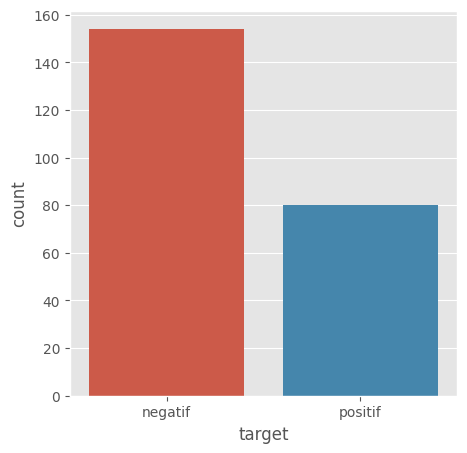

In [8]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='target', data = df2)

Text(0.5, 1.0, 'Distribution of sentiments')

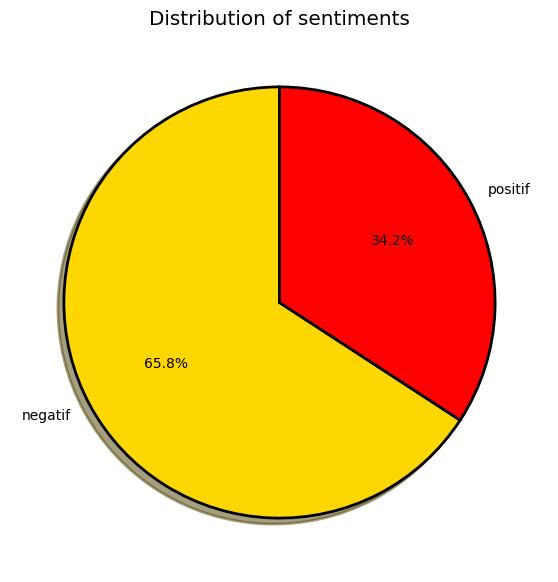

In [9]:
fig = plt.figure(figsize=(7,7))
colors = ("gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = df2['target'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = None, label='')
plt.title('Distribution of sentiments')

In [10]:
pos_tweets = df2[df2.target == 'positif']
pos_tweets

,text,target,TOKENIZATION,STOP_REMOVAL,tweet_normalized,tweet_tokens_stemmed,liststring
21,Mak gw ditelpon sambo,positif,"['mak', 'gw', 'ditelpon', 'sambo']","['mak', 'ditelpon']","['mak', 'ditelpon']","['mak', 'telpon']",mak telpon
29,Lie detector ricki tdk bohong artinya sambo td...,positif,"['lie', 'detector', 'ricki', 'tdk', 'bohong', ...","['lie', 'detector', 'ricki', 'tdk', 'bohong', ...","['lie', 'detector', 'ricki', 'tdk', 'bohong', ...","['lie', 'detector', 'ricki', 'tdk', 'bohong', ...",lie detector ricki tdk bohong tdk tembak alm s...
30,di glok 17 hanya ada DNA Bharada e.sama Agus.s...,positif,"['di', 'glok', '17', 'hanya', 'ada', 'dna', 'b...","['glok', '17', 'dna', 'agus', 'susanto', 'aneh...","['glok', '17', 'dna', 'agus', 'susanto', 'aneh...","['glok', '17', 'dna', 'agus', 'susanto', 'aneh...",glok 17 dna agus susanto aneh senjata hs dna j...
33,"Sambo adalah bukti, seberapa besar kejahatan, ...",positif,"['sambo', 'adalah', 'bukti', 'seberapa', 'besa...","['bukti', 'kejahatan', 'bongkar', 'elemen', 'k...","['bukti', 'kejahatan', 'bongkar', 'elemen', 'k...","['bukti', 'jahat', 'bongkar', 'elemen', 'jujur...",bukti jahat bongkar elemen jujur ketidakjujura...
37,"Enggak nder, temen gue yg namanya ayu malah sa...",positif,"['enggak', 'nder', 'temen', 'gue', 'yg', 'nama...","['nder', 'temen', 'gue', 'namanya', 'ayu', 'an...","['nder', 'temen', 'gue', 'namanya', 'ayu', 'an...","['nder', 'temen', 'gue', 'nama', 'ayu', 'andre...",nder temen gue nama ayu andre erik dian klo ye...
...,...,...,...,...,...,...,...
223,Johannes Tobing Jangan mau diprank Ferdy Sambo...,positif,"['johannes', 'tobing', 'jangan', 'mau', 'dipra...","['johannes', 'tobing', 'diprank', 'hendra', 'k...","['johannes', 'tobing', 'diprank', 'hendra', 'k...","['johannes', 'tobing', 'diprank', 'hendra', 'k...",johannes tobing diprank hendra kurniawan
224,Guru Besar Hukum Pidana Universitas Padjajaran...,positif,"['guru', 'besar', 'hukum', 'pidana', 'universi...","['guru', 'hukum', 'pidana', 'universitas', 'pa...","['guru', 'hukum', 'pidana', 'universitas', 'pa...","['guru', 'hukum', 'pidana', 'universitas', 'pa...",guru hukum pidana universitas padjajaran prof ...
225,Langkah Kuat Maruf Laporkan Hakim Wahyu KY Din...,positif,"['langkah', 'kuat', 'maruf', 'laporkan', 'haki...","['langkah', 'kuat', 'laporkan', 'wahyu', 'ky',...","['langkah', 'kuat', 'laporkan', 'wahyu', 'ky',...","['langkah', 'kuat', 'lapor', 'wahyu', 'ky', 'n...",langkah kuat lapor wahyu ky nilai chairul huda...
227,Terdakwa Ferdy Sambo mengaku tidak mengetahui ...,positif,"['terdakwa', 'ferdy', 'sambo', 'mengaku', 'tid...","['terdakwa', 'mengaku', 'rencana', 'ricky', 'r...","['terdakwa', 'mengaku', 'rencana', 'ricky', 'r...","['dakwa', 'aku', 'rencana', 'ricky', 'rizal', ...",dakwa aku rencana ricky rizal pindah uang rp j...


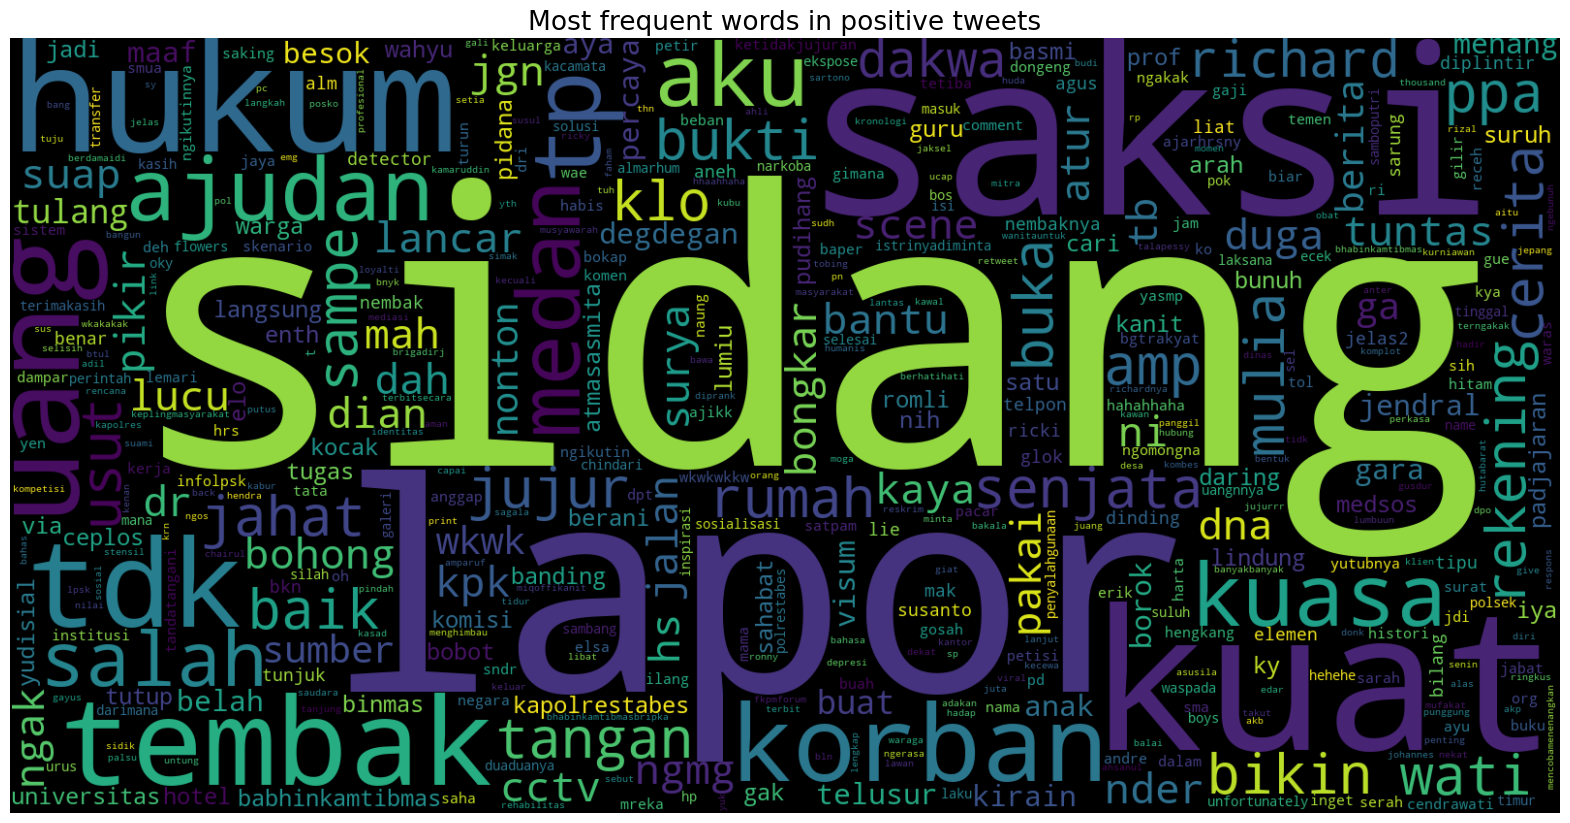

In [11]:
text = ' '.join([word for word in pos_tweets['liststring']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [12]:
neg_tweets = df2[df2.target == 'negatif']
neg_tweets.head()

,text,target,TOKENIZATION,STOP_REMOVAL,tweet_normalized,tweet_tokens_stemmed,liststring
0,"Ini kasus sambo kapan kelarnya sih, bapak gw m...",negatif,"['ini', 'kasus', 'sambo', 'kapan', 'kelarnya',...","['kelarnya', 'sih', 'marah2', 'mulu', 'liat', ...","['kelarnya', 'sih', 'marah2', 'mulu', 'liat', ...","['kelar', 'sih', 'marah2', 'mulu', 'liat', 'si...",kelar sih marah2 mulu liat sidang
1,Siapa Juara Berbohong,negatif,"['siapa', 'juara', 'berbohong']","['juara', 'berbohong']","['juara', 'berbohong']","['juara', 'bohong']",juara bohong
2,Smua HP dikasus Sambo ini baik saksi maupun te...,negatif,"['smua', 'hp', 'dikasus', 'sambo', 'ini', 'bai...","['smua', 'hp', 'dikasus', 'saksi', 'terdakwa',...","['smua', 'hp', 'dikasus', 'saksi', 'terdakwa',...","['smua', 'hp', 'kasus', 'saksi', 'dakwa', 'ban...",smua hp kasus saksi dakwa banyak hilang dirusa...
3,Sidang Sambo dan Candrawathi ini bertele-tele ...,negatif,"['sidang', 'sambo', 'dan', 'candrawathi', 'ini...","['sidang', 'bertele', 'tele', '']","['sidang', 'bertele', 'tele', '']","['sidang', 'tele', 'tele', '']",sidang tele tele
4,Beda coy sambo itu yg perwira harus lulusan AK...,negatif,"['beda', 'coy', 'sambo', 'itu', 'yg', 'perwira...","['beda', 'coy', 'perwira', 'lulusan', 'akpol',...","['beda', 'coy', 'perwira', 'lulusan', 'akpol',...","['beda', 'coy', 'perwira', 'lulus', 'akpol', '...",beda coy perwira lulus akpol 4thn ecek2 mah ta...


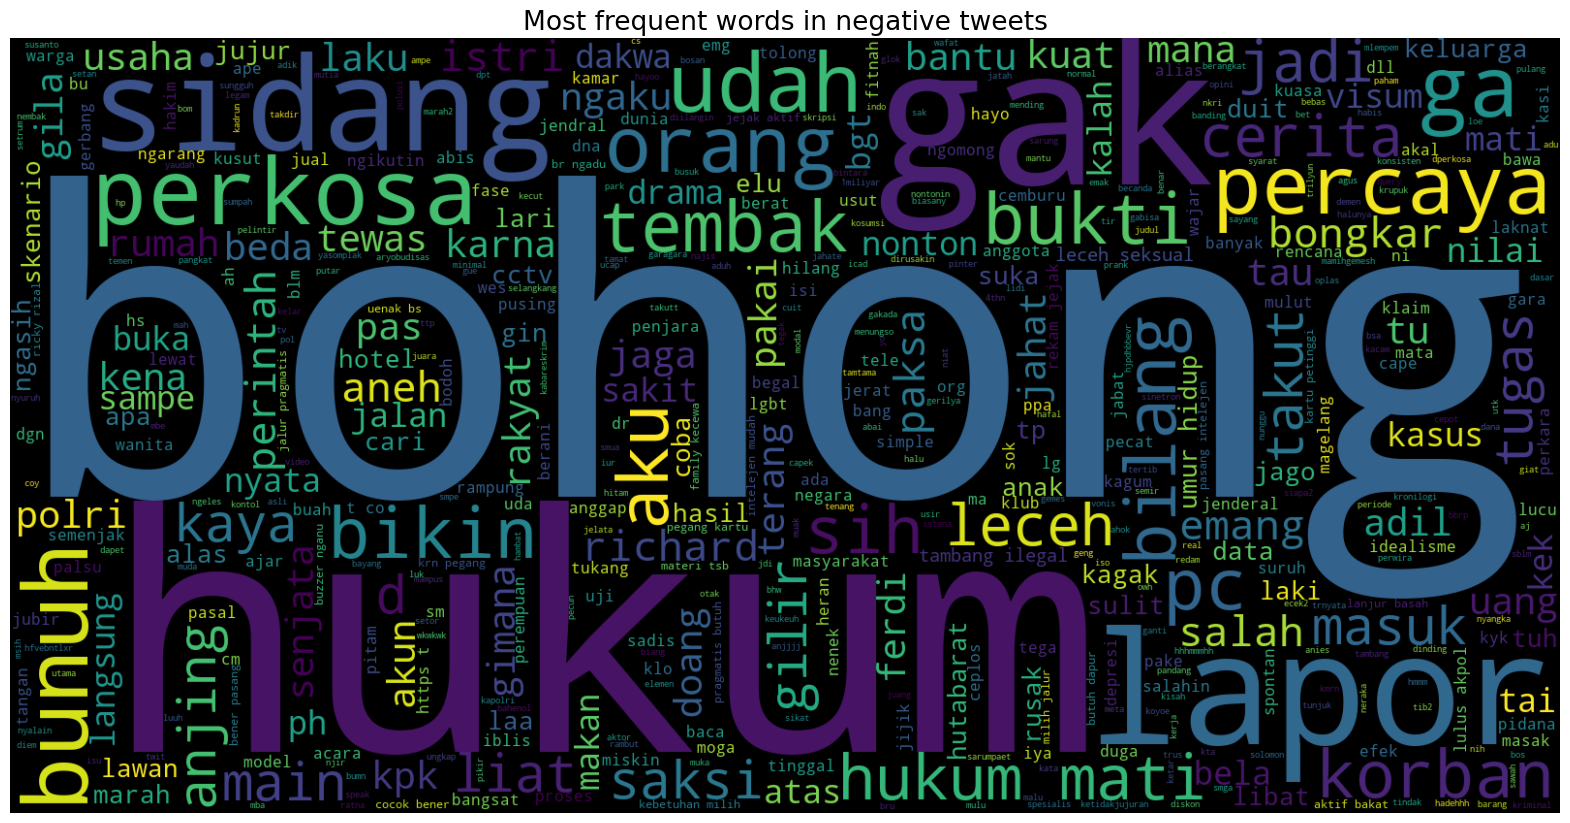

In [13]:
text = ' '.join([word for word in neg_tweets['liststring']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [14]:
vect = CountVectorizer(ngram_range=(1,2)).fit(df2['liststring'])

In [112]:
X = df2['liststring']
a = df2['text']
Y = df2['target']
X = vect.transform(X)
df2

,text,target,TOKENIZATION,STOP_REMOVAL,tweet_normalized,tweet_tokens_stemmed,liststring
0,"Ini kasus sambo kapan kelarnya sih, bapak gw m...",negatif,"['ini', 'kasus', 'sambo', 'kapan', 'kelarnya',...","['kelarnya', 'sih', 'marah2', 'mulu', 'liat', ...","['kelarnya', 'sih', 'marah2', 'mulu', 'liat', ...","['kelar', 'sih', 'marah2', 'mulu', 'liat', 'si...",kelar sih marah2 mulu liat sidang
1,Siapa Juara Berbohong,negatif,"['siapa', 'juara', 'berbohong']","['juara', 'berbohong']","['juara', 'berbohong']","['juara', 'bohong']",juara bohong
2,Smua HP dikasus Sambo ini baik saksi maupun te...,negatif,"['smua', 'hp', 'dikasus', 'sambo', 'ini', 'bai...","['smua', 'hp', 'dikasus', 'saksi', 'terdakwa',...","['smua', 'hp', 'dikasus', 'saksi', 'terdakwa',...","['smua', 'hp', 'kasus', 'saksi', 'dakwa', 'ban...",smua hp kasus saksi dakwa banyak hilang dirusa...
3,Sidang Sambo dan Candrawathi ini bertele-tele ...,negatif,"['sidang', 'sambo', 'dan', 'candrawathi', 'ini...","['sidang', 'bertele', 'tele', '']","['sidang', 'bertele', 'tele', '']","['sidang', 'tele', 'tele', '']",sidang tele tele
4,Beda coy sambo itu yg perwira harus lulusan AK...,negatif,"['beda', 'coy', 'sambo', 'itu', 'yg', 'perwira...","['beda', 'coy', 'perwira', 'lulusan', 'akpol',...","['beda', 'coy', 'perwira', 'lulusan', 'akpol',...","['beda', 'coy', 'perwira', 'lulus', 'akpol', '...",beda coy perwira lulus akpol 4thn ecek2 mah ta...
...,...,...,...,...,...,...,...
229,Ape dibilang FS jago berbohong,negatif,"['ape', 'dibilang', 'fs', 'jago', 'berbohong']","['ape', 'dibilang', 'jago', 'berbohong']","['ape', 'dibilang', 'jago', 'berbohong']","['ape', 'bilang', 'jago', 'bohong']",ape bilang jago bohong
230,sangat mulia sekali mereka,positif,"['sangat', 'mulia', 'sekali', 'mereka']",['mulia'],['mulia'],['mulia'],mulia
231,Ferdy Sambo Dinilai Cari Simpati Berbohong Kam...,negatif,"['ferdy', 'sambo', 'dinilai', 'cari', 'simpati...","['dinilai', 'cari', 'simpati', 'berbohong', 'k...","['dinilai', 'cari', 'simpati', 'berbohong', 'k...","['nilai', 'cari', 'simpati', 'bohong', 'kamaru...",nilai cari simpati bohong kamaruddin takut huk...
232,waah gila sambo,negatif,"['waah', 'gila', 'sambo']","['waah', 'gila']","['waah', 'gila']","['waah', 'gila']",waah gila


In [113]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [114]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (187, 2989)
Size of y_train: (187,)
Size of x_test: (47, 2989)
Size of y_test: (47,)


In [115]:
import warnings
warnings.filterwarnings('ignore')

In [128]:
logreg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000, n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 78.72%


In [117]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[31  0]
 [10  6]]


              precision    recall  f1-score   support

     negatif       0.76      1.00      0.86        31
     positif       1.00      0.38      0.55        16

    accuracy                           0.79        47
   macro avg       0.88      0.69      0.70        47
weighted avg       0.84      0.79      0.75        47



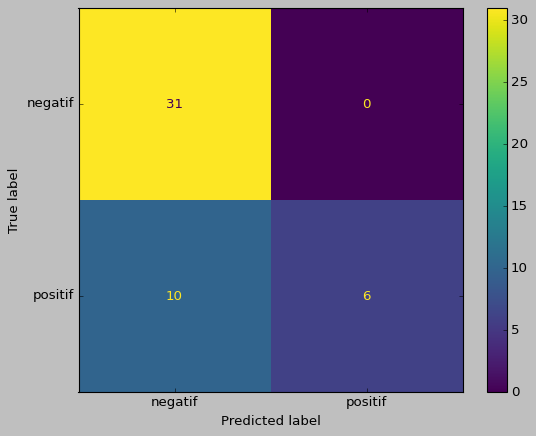

In [120]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

In [159]:
tweet = 'sambo berkata jujur'
vectTweet = vect.transform(np.array([tweet]))  # vectorizes the tweet using our vectorizer

prediction = logreg.predict(vectTweet)  # predicts class of the tweet
# print('Tweet is', 'positive' if prediction[0]=='positif' else 'negatif')
if prediction[0]=='positif':
    print('positif')
elif prediction[0]=='negatif':
    print('negatif')
else :
    print('tidak berkategori')

positif


In [145]:
tweet = 'sambo menembak'
vectTweet = vect.transform(np.array([tweet]))  # vectorizes the tweet using our vectorizer

prediction = logreg.predict(vectTweet)  # predicts class of the tweet
# print('Tweet is', 'positive' if prediction[0]=='positif' else 'negatif')
if prediction[0]=='positif':
    print('positif')
elif prediction[0]=='negatif':
    print('negatif')
else :
    print('tidak berkategori')

negatif


In [121]:
from sklearn.model_selection import GridSearchCV

In [133]:
grid_values = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'penalty':['none', 'elasticnet', 'l1', 'l2'],'C':[0.001, 0.01, 0.1, 1, 10, 100]}]

grid1 = GridSearchCV(estimator = logreg,
                     param_grid = grid_values,
                     scoring = 'accuracy',
                     cv = 5,
                     verbose=0)


grid1.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=5000, random_state=0,
                                          solver='liblinear'),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'penalty': ['none', 'elasticnet', 'l1', 'l2'],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']}],
             scoring='accuracy')

AttributeError: 'Series' object has no attribute 'todense'

In [134]:
print("Best parameters:", grid1.best_params_)

Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}


In [141]:
# logreg = LogisticRegression(max_iter=500)
logreg = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500, n_jobs=None, penalty='l2',
                   random_state=0, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 78.72%


In [137]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[30  1]
 [ 9  7]]


              precision    recall  f1-score   support

     negatif       0.77      0.97      0.86        31
     positif       0.88      0.44      0.58        16

    accuracy                           0.79        47
   macro avg       0.82      0.70      0.72        47
weighted avg       0.81      0.79      0.76        47



In [78]:
from sklearn.svm import LinearSVC

In [79]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [80]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))

test accuracy: 72.34%


In [81]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[27  4]
 [ 9  7]]


              precision    recall  f1-score   support

     negatif       0.75      0.87      0.81        31
     positif       0.64      0.44      0.52        16

    accuracy                           0.72        47
   macro avg       0.69      0.65      0.66        47
weighted avg       0.71      0.72      0.71        47

